Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and
ingredients. Measurements for Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer,Coarse Aggregate, and Fine Aggregate are all in units of kg / m^3 of concrete mixture.  The Age is measured in days. The Concrete Compressive Strength is measured in MPa.

These data were downloaded from the UCI Machine Learning Repository ( https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength).  

The original source of the data is:  I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

We are building a simple model of the form  y=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥3+𝛽4𝑥4+𝛽5𝑥5+𝛽6𝑥6+𝛽7𝑥7+𝛽8𝑥8, where:

After reading the data, you should use this code to change the column names.

df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

 - x1 is Concrete
 - x2 is Slag
 - x3 is FlyAsh
 - x4 is Water
 - x5 is Plasticizer
 - x6 is CoarseAgg
 - x7 is FineAgg
 - x8 is Age
 and all of the 𝛽 values are determined by linear regression.

Problem 1: Regression

Develop a machine learning model that can predict the Concrete Compressive Strength for a particular concrete recipe given the quantities for input ingredients and a number of days (Age) for curing the concrete.
This is a baseline model.  What we are primarily interested in here is:
1. Making sure that the data is properly formatted for scikit-learn.
2. Identifying and separating features (X) and target (y).
3. Having a base score for the model that we can use to measure progress.
4. Validating that we have enough data for both training and testing.
5. Use at least 7 conventional machine learning algorithms and DEEP LEARNING (Tensorflow - Keras or Pytorch) to predict Concrete Compressive Strength

Problem 2: Classification
Develop a machine learning model that can predict the ConcreteClass for a particular concrete recipe.

Take concrete regression data and modify it to be suitable for  classification examples.# create new categorical targets

Create new columns using the following functions
def green_classifier(s):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"


def strength_classifer(x):
    """
    Use numeric data to create a ConcreteClass categorical feature.  This is
    based on "CIP 35 - Testing Compressive Strength of Concrete", National
    Ready Mixed Concrete Association (www.nrmca.org), 2003 & 2014.
    """

    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

# convert Plasticizer to text (the numeric values are embedded in Green)
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

# remove Strength feature as replaced by categorical target ConcreteClass
df.drop("Strength", axis=1, inplace=True)

Develop a machine learning model that can predict the ConcreteClass for a particular concrete recipe given the quantities for input ingredients and a number of days (Age) for curing the concrete.

This is a baseline model.  What we are primarily interested in here is:
1. Making sure that the data is properly formatted for scikit-learn.
2. Identifying and separating features (X) and target (y).
3. Having a base score for the model that we can use to measure progress.
4. Validating that we have enough data for both training and testing.
5. Use at least 7 conventional machine learning algorithms and DEEP LEARNING (Tensorflow - Keras or Pytorch)  to predict ConcreteClass

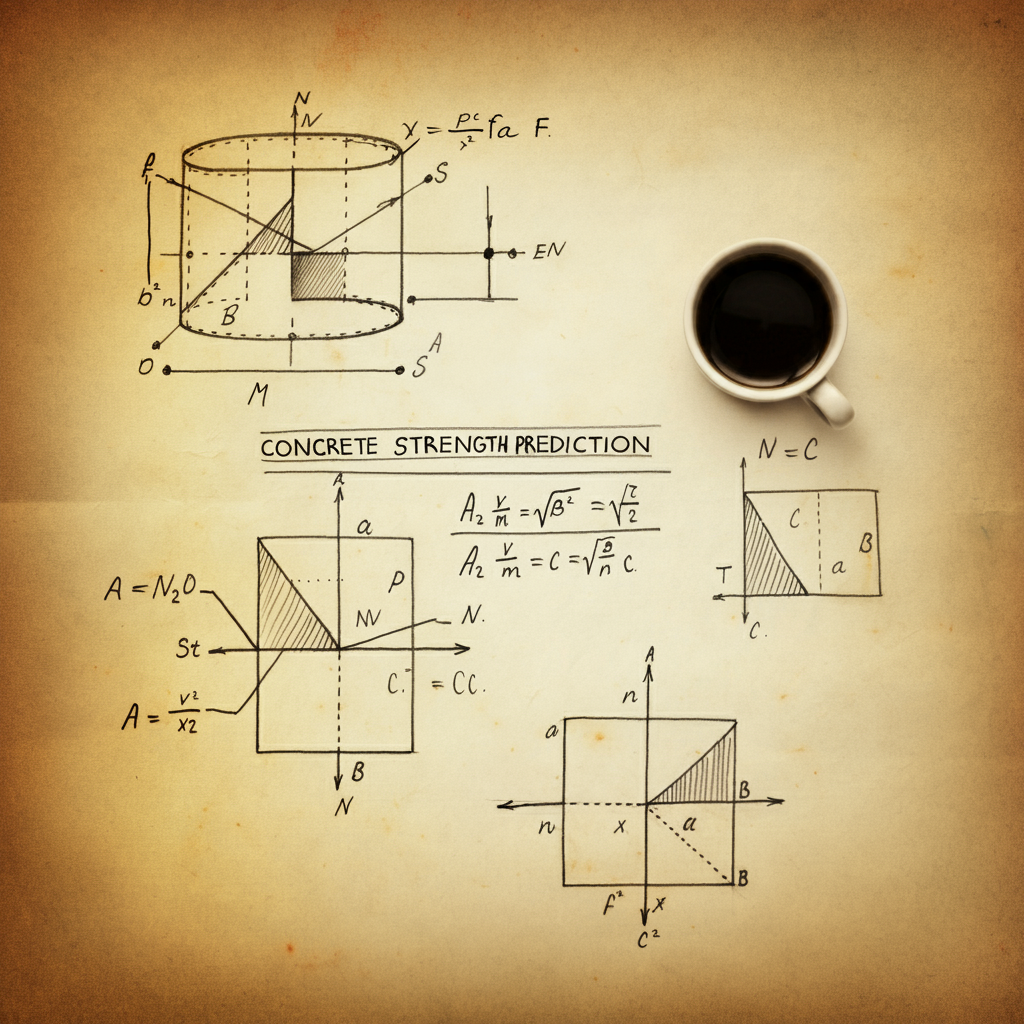

# Problem 1: Regression

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [44]:
#pip install xlrd

In [45]:
# read concrete data xlsx file
df = pd.read_excel('/kaggle/input/concrete-data-xls/Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [46]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [47]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [48]:
# age to float
df['Age'] = df['Age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   float64
 8   Strength     1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [49]:
df.isnull().sum()

Cement         0
Slag           0
FlyAsh         0
Water          0
Plasticizer    0
CoarseAgg      0
FineAgg        0
Age            0
Strength       0
dtype: int64

In [50]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
pd.DataFrame(X_train, columns=X.columns)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age
995,158.60,148.90,116.00,175.10,15.00,953.3,719.70,28.0
507,424.00,22.00,132.00,178.00,8.48,822.0,750.00,28.0
334,275.07,0.00,121.35,159.48,9.90,1053.6,777.50,3.0
848,252.00,97.00,76.00,194.00,8.00,835.0,821.00,28.0
294,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,3.0
...,...,...,...,...,...,...,...,...
87,286.30,200.90,0.00,144.70,11.20,1004.6,803.70,3.0
330,246.83,0.00,125.08,143.30,11.99,1086.8,800.89,14.0
466,190.34,0.00,125.18,166.61,9.88,1079.0,798.90,100.0
121,475.00,118.80,0.00,181.10,8.90,852.1,781.50,28.0


In [54]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

In [55]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

Linear Regression - MSE: 9.7967, R2: 0.6275
Ridge Regression - MSE: 9.7964, R2: 0.6276
Lasso Regression - MSE: 10.6008, R2: 0.5639
Elastic Net - MSE: 11.1847, R2: 0.5145
Decision Tree - MSE: 6.9665, R2: 0.8117
Random Forest - MSE: 5.6124, R2: 0.8778
Gradient Boosting - MSE: 5.5154, R2: 0.8819
SVR - MSE: 9.4328, R2: 0.6547
KNN - MSE: 8.5098, R2: 0.7190


In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
]);

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [58]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Deep Learning - MSE: {mse:.4f}, R2: {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Deep Learning - MSE: 54.9531, R2: 0.7867


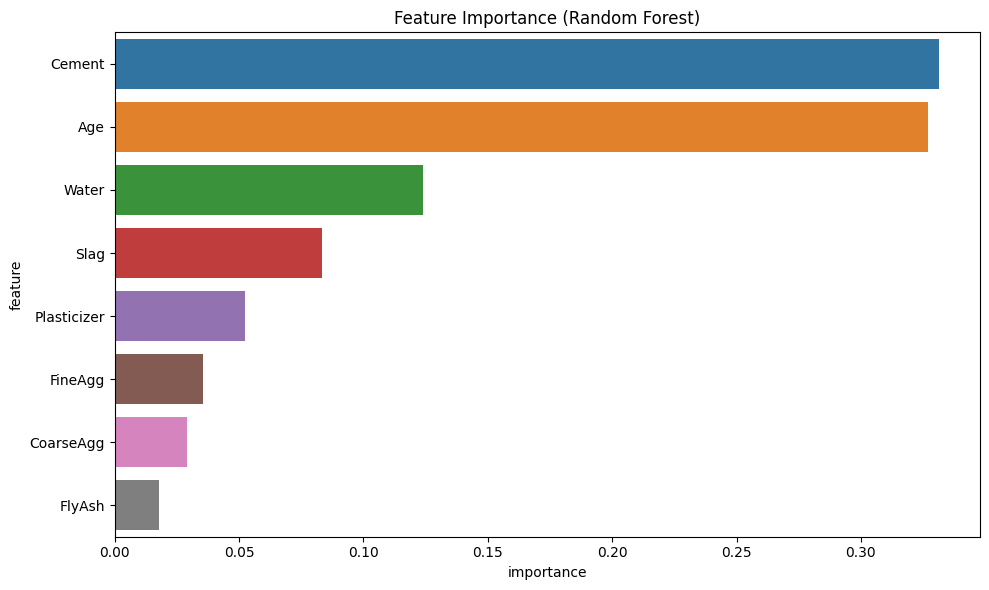

In [59]:
# Added Feature Importance 
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

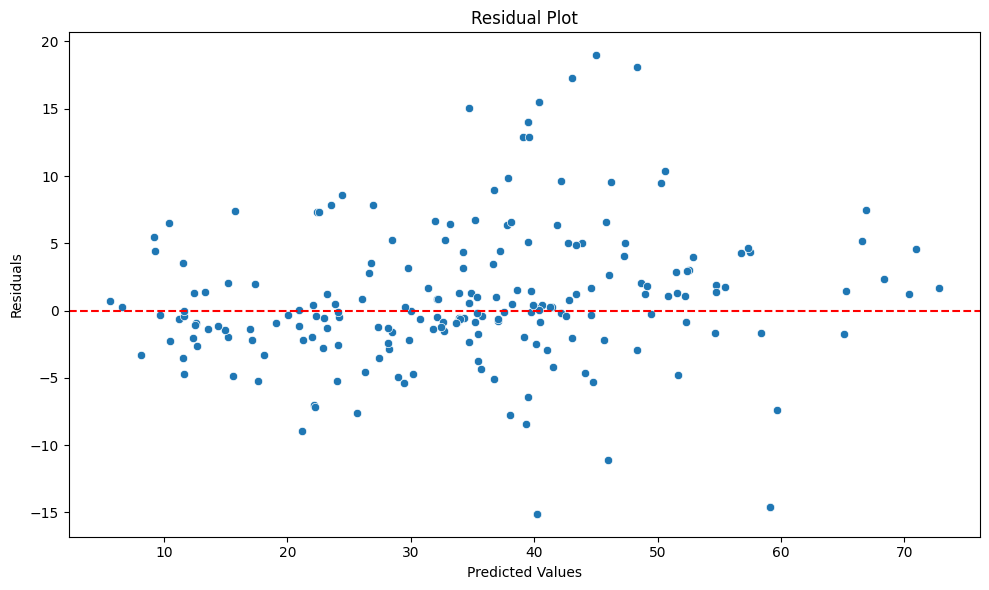

In [60]:
# Residual Plot (using Random Forest predictions as an example)
y_pred_rf = rf_model.predict(X_test_scaled)
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

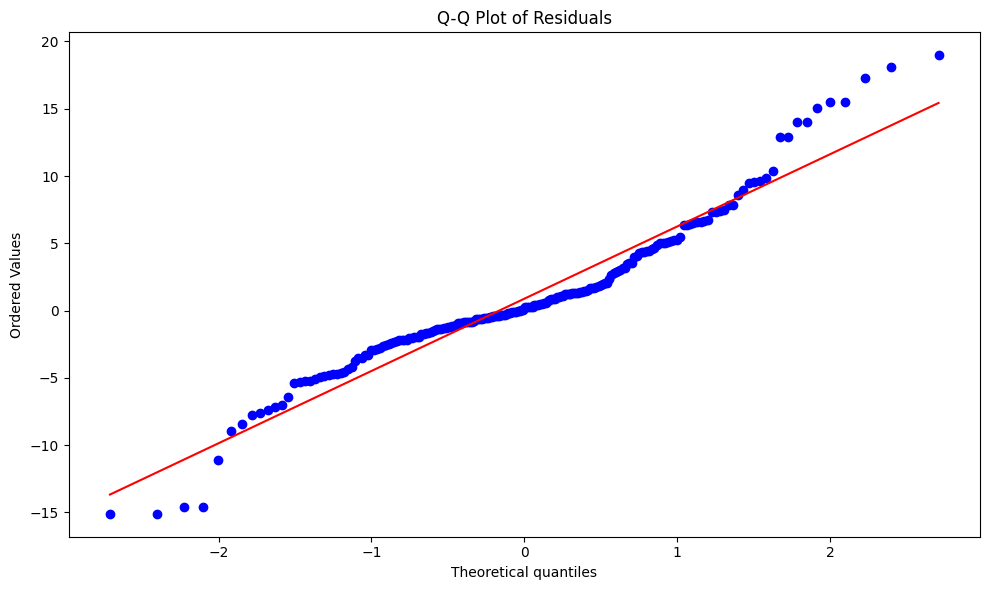

In [61]:
# Q-Q Plot for residuals
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Problem 2

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf

In [63]:
df = pd.read_excel('/kaggle/input/concrete-data-xls/Concrete_Data.xls')
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']
df['Age'] = df['Age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   float64
 8   Strength     1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [64]:
def green_classifier(s):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"

In [65]:
def strength_classifer(x):
    """
    Use numeric data to create a ConcreteClass categorical feature.  This is
    based on "CIP 35 - Testing Compressive Strength of Concrete", National
    Ready Mixed Concrete Association (www.nrmca.org), 2003 & 2014.
    """

    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"

In [66]:
df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

# convert Plasticizer to text (the numeric values are embedded in Green)
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

# remove Strength feature as replaced by categorical target ConcreteClass
df.drop("Strength", axis=1, inplace=True)

In [67]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28.0,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28.0,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270.0,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365.0,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360.0,n/a,commercial


In [68]:
df.describe(include="object")

,Plasticizer,Green,ConcreteClass
count,1030,1030,1030
unique,2,2,4
top,yes,green,commercial
freq,651,560,633


In [69]:
X = df.drop('ConcreteClass', axis=1)
y = df['ConcreteClass']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
numeric_features = ['Cement', 'Slag', 'FlyAsh', 'Water', 'CoarseAgg', 'FineAgg', 'Age']
categorical_features = ['Green', 'Plasticizer']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

In [72]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [73]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression:
Accuracy: 0.8107
Classification Report:


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                precision    recall  f1-score   support

    commercial       0.87      0.91      0.89       133
 high-strength       1.00      0.17      0.29         6
non-structural       0.78      0.91      0.84        32
   residential       0.55      0.46      0.50        35

      accuracy                           0.81       206
     macro avg       0.80      0.61      0.63       206
  weighted avg       0.81      0.81      0.80       206


Decision Tree:
Accuracy: 0.8398
Classification Report:
                precision    recall  f1-score   support

    commercial       0.92      0.90      0.91       133
 high-strength       1.00      0.50      0.67         6
non-structural       0.92      0.72      0.81        32
   residential       0.57      0.77      0.66        35

      accuracy                           0.84       206
     macro avg       0.85      0.72      0.76       206
  weighted avg       0.86      0.84      0.84       206


Random Forest:
Accuracy: 0.8932
Classific

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Gradient Boosting:
Accuracy: 0.8835
Classification Report:
                precision    recall  f1-score   support

    commercial       0.92      0.95      0.93       133
 high-strength       1.00      0.67      0.80         6
non-structural       0.96      0.84      0.90        32
   residential       0.68      0.71      0.69        35

      accuracy                           0.88       206
     macro avg       0.89      0.79      0.83       206
  weighted avg       0.89      0.88      0.88       206


SVM:
Accuracy: 0.7573
Classification Report:
                precision    recall  f1-score   support

    commercial       0.86      0.93      0.89       133
 high-strength       0.00      0.00      0.00         6
non-structural       0.68      0.47      0.56        32
   residential       0.45      0.49      0.47        35

      accuracy                           0.76       206
     macro avg       0.50      0.47      0.48       206
  weighted avg       0.73      0.76      0.74    

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })


# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df = results_df.sort_values('Accuracy', ascending=False)

# Display the table
print("\nModel Performance Summary (Best to Worst):")
print(results_df.to_string(index=False, float_format='{:.4f}'.format));

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp


Model Performance Summary (Best to Worst):
              Model  Accuracy  Precision  Recall  F1-score
  Gradient Boosting    0.8835     0.8875  0.8835    0.8837
      Random Forest    0.8786     0.8812  0.8786    0.8749
      Decision Tree    0.8544     0.8690  0.8544    0.8568
Logistic Regression    0.8107     0.8066  0.8107    0.7983
                KNN    0.7718     0.7569  0.7718    0.7600
                SVM    0.7573     0.7340  0.7573    0.7414
        Naive Bayes    0.6796     0.7290  0.6796    0.6927


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
preprocessor.fit(X)
X_processed = preprocessor.transform(X)

num_classes = len(y.unique())

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_processed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']);


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
y_numeric = pd.Categorical(y).codes

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_processed, y_numeric, test_size=0.2, random_state=42)

model.fit(X_train_dl, y_train_dl, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


In [78]:
y_pred_dl = model.predict(X_test_dl)
y_pred_dl_classes = np.argmax(y_pred_dl, axis=1)

accuracy_dl = accuracy_score(y_test_dl, y_pred_dl_classes)
print("\nDeep Learning Model:")
print(f"Accuracy: {accuracy_dl:.4f}")
print("Classification Report:")
print(classification_report(y_test_dl, y_pred_dl_classes))

# Validate data sufficiency
print(f"\nTotal samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Deep Learning Model:
Accuracy: 0.8592
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       133
           1       0.50      0.17      0.25         6
           2       0.85      0.88      0.86        32
           3       0.70      0.60      0.65        35

    accuracy                           0.86       206
   macro avg       0.74      0.65      0.67       206
weighted avg       0.85      0.86      0.85       206


Total samples: 1030
Training samples: 824
Testing samples: 206


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


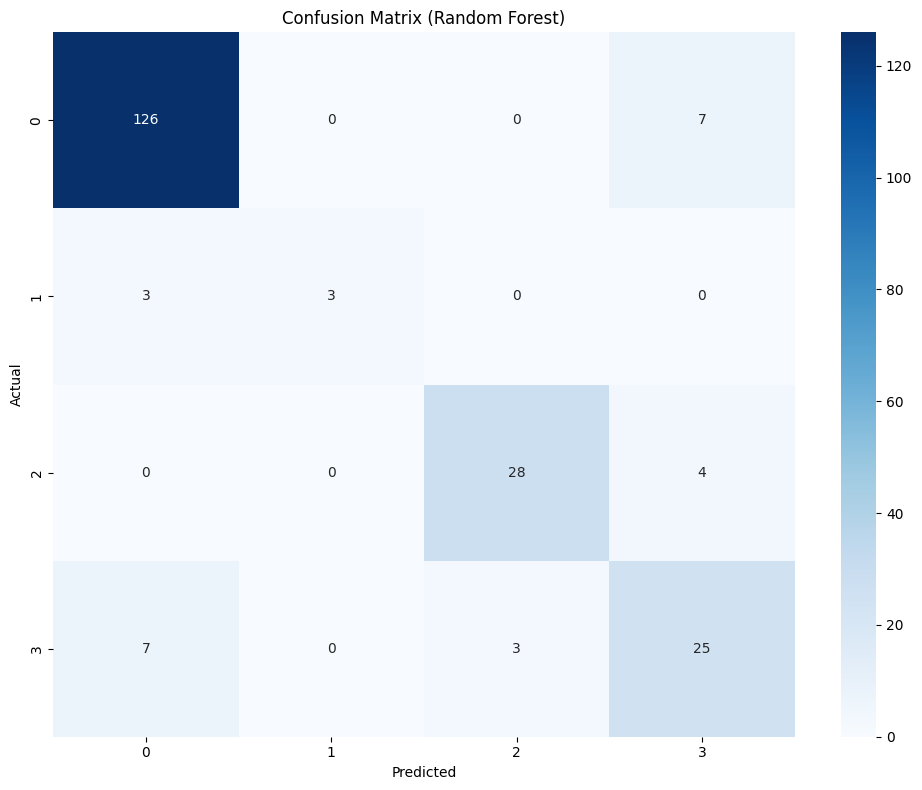

In [79]:
# Confusion Matrix (using Random Forest as an example)
rf_classifier = RandomForestClassifier()
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.tight_layout()
plt.show()

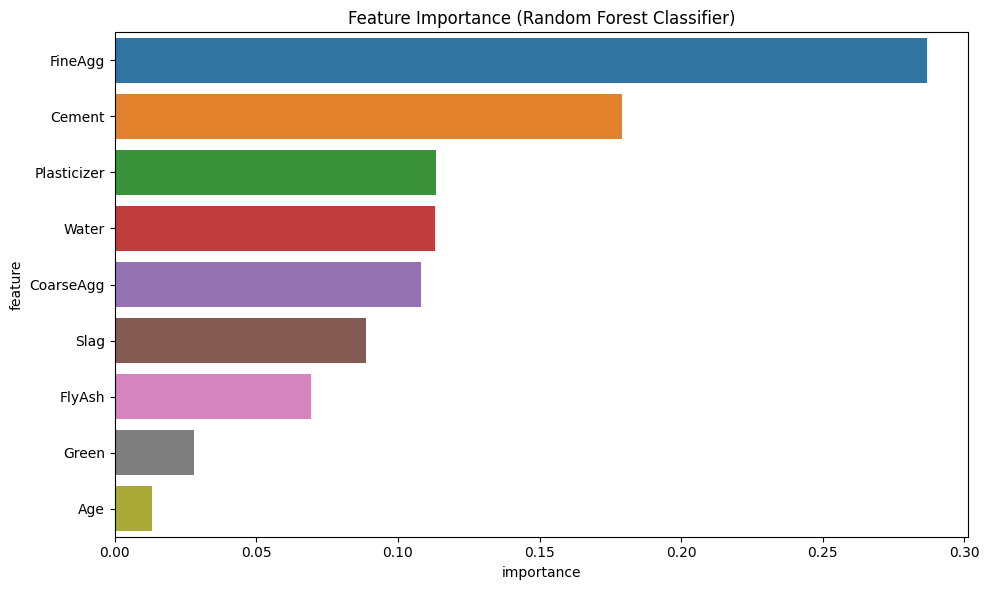

In [80]:
# Feature Importance for Classification
feature_importance_clf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_clf)
plt.title('Feature Importance (Random Forest Classifier)')
plt.tight_layout()
plt.show()